In [15]:
import matplotlib.pylab as plt
%matplotlib inline

In [16]:
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import time

In [4]:
df1 = pd.read_csv('household_power_consumption_set_1.csv', 
                   sep=',',header=0,low_memory=False)
df2 = pd.read_csv('household_power_consumption_set_2.csv', 
                   sep=',',header=0,low_memory=False)
df3 = pd.read_csv('household_power_consumption_set_3.csv', 
                   sep=',',header=0,low_memory=False)
df = df1.append(df2.append(df3)) # Append the datasets


In [5]:
#tic = time.clock()
#pd.to_datetime(df['Date']+' '+df['Time'])
#toc = time.clock()
#toc-tic #took 306s (5 minutes)

In [6]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17


In [7]:
df4 = df.apply(lambda x: pd.to_numeric(x, errors='coerce')) # This ensures that the columns are converted to numeric

In [8]:
df4['Date'] = df['Date'] # Extract the original date because the .apply operation makes Date and Time into NaN
df4['Time'] = df['Time'] # Extract the original time because the .apply operation makes Date and Time into NaN

In [9]:
# Create a new column
df4['Datetime'] = pd.to_datetime(df['Date']+' '+df['Time']) # took 5 minutes for me

In [11]:
df5=df4[['Datetime','Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]

In [12]:
df5.head(2)

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0,1,17
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0,1,16


In [13]:
df5 = df5.reset_index(drop=True)

In [31]:
print 'First entry begins in MM/DD/YYYY = ', df5['Datetime'][0].month,'/',df5['Datetime'][0].day,'/',df5['Datetime'][0].year
print 'The time the entry begins is at = ', df5['Datetime'][0].time()
print 'The day of the week is = ', df5['Datetime'][0].weekday()
#Return the day of the week as an integer, where Monday is 0 and Sunday is 6.

First entry begins in MM/DD/YYYY =  12 / 16 / 2006
The time the entry begins is at =  17:24:00
The day of the week is =  5


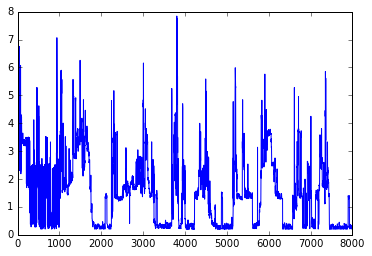

In [23]:
df5['Global_active_power'].head(8000).plot()